
# **Assignment 1-Wang Mengyun-S5715407**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [72]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for creating complex plots in a MATLAB-like interface
import pylab # used for quick and easy figure, subplot, and chart creation
import pingouin as pg # used for statistical analysis

df_mh = pd.read_csv('MillerHadenData.csv')

In [73]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [74]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [75]:
# Q1b (code):
# Check for missing values
# Source for "df.isnull().sum()": https://realpython.com/python-data-cleaning-numpy-pandas/
missing_values = df_mh.isnull().sum()

# Print the number of missing values for each column
print('Missing values in each column:')
print(missing_values)

# Check whether there is a data point for each participant on both variables
# Source for "df.isnull().any(axis=1)": https://note.nkmk.me/en/python-pandas-nan-extract/
reading_iq_missing = df_mh[['Abil', 'IQ']].isnull().any(axis=1)
# Print the number of participants with missing data in Reading Ability or IQ
print('Number of participants with missing data in Reading Ability or IQ:')
print(reading_iq_missing.sum())

Missing values in each column:
Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Number of participants with missing data in Reading Ability or IQ:
0


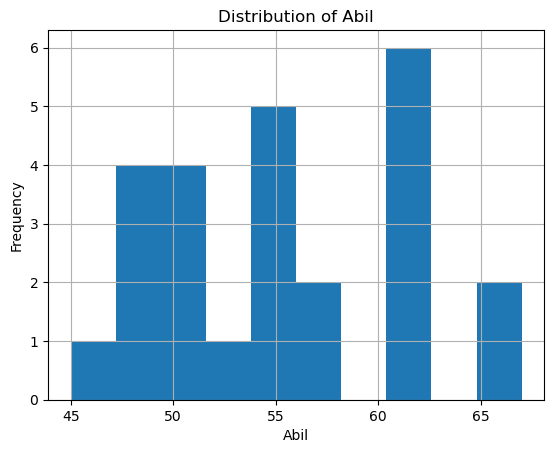

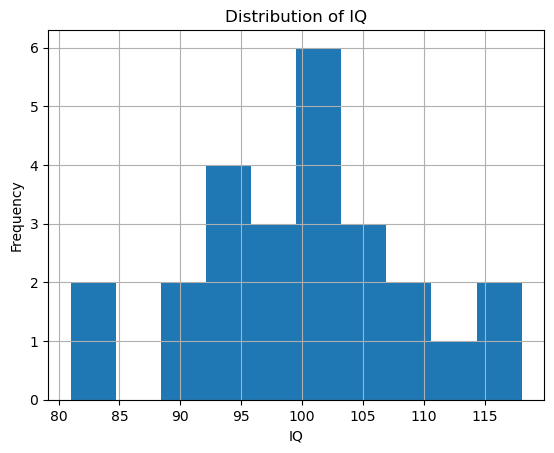

In [76]:
# Q1c (code):
# Check data distribution

# Define the list of variables for plotting distribution
variables = ['Abil', 'IQ']
# Make a histogram for each variable
for variable in variables:
    df_mh[variable].hist()  # Plotting
    plt.title(f'Distribution of {variable}')  # Set the title
    plt.xlabel(variable)  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.show()

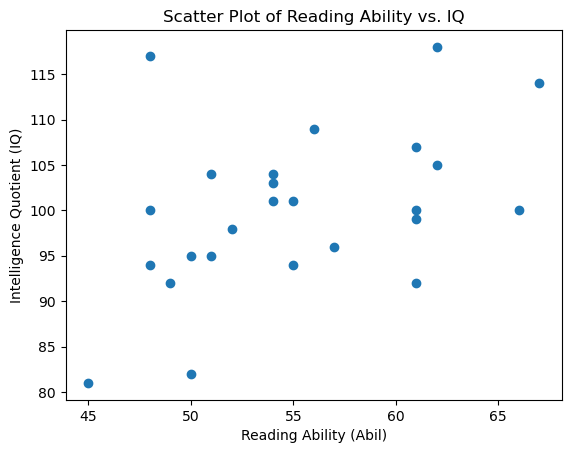

In [77]:
# Q1d (code):
# Scatter plot
plt.scatter(df_mh['Abil'], df_mh['IQ'])  # Create scatter plot
plt.title('Scatter Plot of Reading Ability vs. IQ')  # Set the title of the plot
plt.xlabel('Reading Ability (Abil)')  # Set the x-axis label
plt.ylabel('Intelligence Quotient (IQ)')  # Set the y-axis label
plt.show()  

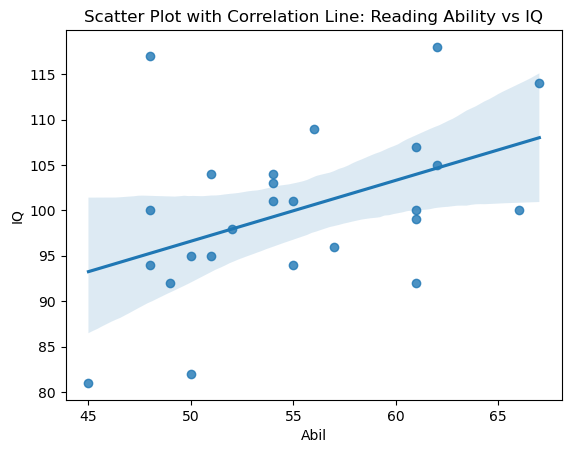

In [78]:
# Q1e (code):
# Correlation line

# Use Seaborn's regplot to plot the scatter plot and add the regression line
sns.regplot(x='Abil', y='IQ', data=df_mh)
# Add title to the plot
plt.title('Scatter Plot with Correlation Line: Reading Ability vs IQ')
# Show the plot
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):
"Spearman. It is because reading ability and IQ are not normally distributed."

In [80]:
# Q2b (code):
# Calculate Spearman coefficient 

# H0: There is no correlation between 'Abil' and 'IQ' 
from scipy.stats import spearmanr 
spearman_corr, p = spearmanr(df_mh['Abil'], df_mh['IQ'])

# Print the result rounded to three decimal places
print(f'Spearman Correlation Coefficient: {spearman_corr:.3f}')
print(f'P-value: {p:.3f}')

# Interpret the p-value:
if p < 0.05:
    print('The observed differences are statiscally significant - H0 is rejected')
else:
    print('The observed differences are not statiscally significant - H1 is rejected')

Spearman Correlation Coefficient: 0.441
P-value: 0.027
The observed differences are statiscally significant - H0 is rejected


### Q2c (answer with words):
**Direction of the Association**: The correlation coefficient of 0.441indicates a positive association between the two variables. This means that as one variable increases, the other variable tends to increase as well.

**Strength of the Association**: With respect to the strength of the association, 0.441can be considered a moderate positive correlation. It is not weak, but it is also not a strong correlation.

**Statistical Significance**: The p-value of 0.0272 is less than the common alpha level of 0.05, which suggests that H0 could be rejected and the correlation observed is statistically significant. In other words, there is only a 2.72% probability that the observed association is due to random chance, and hence, it is unlikely that the positive correlation occurred by chance.

**Conclusion**: It can be reasonably confident that there is a statistically significant moderate positive association between reading ability and IQ in the sample that was tested.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [81]:
# Q3a (answer in words):
# H0: There is no association between time spent reading at home and reading ability
# H1: There is an association between time spent reading at home and reading ability

In [82]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # used for data analysis
from scipy.stats import chi2_contingency # used for performing the Chi-square test

# Define the rounded average for Reading Ability and Home
average_abil = round(df_mh['Abil'].mean())
average_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column based on the mean of 'Reading Ability' (Abil)
# Source for the combination of ".apply() and lambda expression": https://stackoverflow.com/questions/69235288/using-lambda-with-apply-in-pandas
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= average_abil else 'High')

# Create the Rank_Home column based on the mean number of minutes spent reading at home per week ('Home')
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Infrequent' if x <= average_home else 'Frequent')

df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [83]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
# Show Contingency Matrix
print(contingency_matrix)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [84]:
# Q3d (code):
# Perform the Chi-square test
import scipy.stats as stats
chi2, p, dof, expected = stats.chi2_contingency(contingency_matrix)
    
# Print the result rounded to three decimal places
print(f'Chi-square statistic: {chi2:.3f}')
print(f'P-value: {p:.3f}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n {expected}')

# Interpret the p-value:
if p < 0.05:
    print('The observed differences are statiscally significant - H0 is rejected')
else:
    print('The observed differences are not statiscally significant - H1 is rejected')

Chi-square statistic: 6.500
P-value: 0.011
Degrees of freedom: 1
Expected frequencies:
 [[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


### Q3e (answer in words):
**Explanation**：The p-value is less than 0.05, therefore we can reject the null hypothesis, which means there is sufficient evidence to indicate a significant association between reading time at home and reading ability.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [89]:
import pandas as pd # used for data analysis
from scipy import stats # used for statistical tests
import numpy as np #sed for numerical computing
import matplotlib.pyplot as plt # used for plotting
import seaborn as sns # used for plotting more attractive graphics

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [90]:
# Q4a (code):
# Calculate mean and standard deviation for age

# Mean
mean_age = df_evaluators['age'].mean()

# STD
std_dev_age = df_evaluators['age'].std()

# Print the result rounded to three decimal places
print(f'The mean age is: {mean_age:.3f}')
print(f'The standard deviation of age is: {std_dev_age:.3f}')

The mean age is: 30.853
The standard deviation of age is: 6.238


### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [91]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

# Count the number of each sex
sex_counts = df_evaluators['sex'].value_counts()
sex_counts

sex
2.0    30
1.0     4
Name: count, dtype: int64

In [92]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [93]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
# Source for ".isin()": https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values/17071908#17071908
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
grouped_ratings = filtered_ratings.groupby('eval_id')['Rating']
mean_ratings = grouped_ratings.mean()

# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
# Source for ".reset_index(drop = True)": https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows/34879805#34879805
mean_intellect_ratings = mean_ratings.reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect_ratings['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
# Source for "pd.concat()": https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe/21232849#21232849
ratings2 = pd.concat([mean_intellect_ratings, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
# Source for "df.merge()": https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Rating', 'Category', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Rating,Category,condition
0,1,6.000000,hire,listened
1,1,7.000000,impression,listened
2,1,6.000000,intellect,listened
3,2,4.000000,hire,listened
4,2,4.666667,impression,listened


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis: 
There is no significant difference between overall ratings on the {intellect, hire, impression} scale 
between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). 

# Alternative hypothesis:
Alternatively, we could state it as there will be a significant difference 
between overall ratings on the {intellect, hire, impression} scale 
between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
TWO-tail.
Because we are uncertain whether evaluators listening to the 
presentations will rate them higher or lower compared to those reading them.

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
IV: condition
DV: Rating


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [95]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for performing Shapiro-Wilk test, levene' test, and t-test  

# Descriptive analysis of the ratings
ratings_desc = ratings2['Rating'].describe()
ratings_desc

count    117.000000
mean       4.561254
std        2.240198
min        0.000000
25%        3.000000
50%        4.666667
75%        6.000000
max        9.000000
Name: Rating, dtype: float64

In [101]:
# Test for normal distribution (Shapiro-Wilk test)

# H0: The sample data is normally distributed.

# Create an empty dictionary to store results of Shapiro-Wilk test
shapiro_results = {}

# Define the conditions (listened or read) and rating categories (Hire, Impression, Intellect)
conditions = ['listened', 'read']
categories = ['hire', 'impression', 'intellect']

# Loop through each combination of condition and category
for condition in conditions:
    for category in categories:
        # Construct the combined name, e.g., 'listened_hire'
        combined_category = f'{condition}_{category}'
        print(f'Shapiro-Wilk test for {combined_category}:')

        # Filter out the data for the current condition and rating category from the DataFrame
        category_data = ratings2[(ratings2['condition'] == condition) & (ratings2['Category'] == category)]['Rating']

        # Perform the Shapiro-Wilk normality test
        stat, p = shapiro(category_data)

        # Store the test statistic and p-value
        shapiro_results[combined_category] = {'Statistic': stat, 'p-value': p}

        # Print out the test statistic and p-value, rounded to three decimal places
        print(f'Test Statistic = {stat:.3f}, p-value = {p:.3f}')

        # Interpret the p-value
        if p > 0.05:
            print('Failed to reject H0 (data appears to be normally distributed)')
        else:
            print('Rejected H0 (data does not appear to be normally distributed)')

        # Print an empty line for better readability of the results
        print('\n')

Shapiro-Wilk test for listened_hire:
Test Statistic = 0.939, p-value = 0.209
Failed to reject H0 (data appears to be normally distributed)


Shapiro-Wilk test for listened_impression:
Test Statistic = 0.939, p-value = 0.213
Failed to reject H0 (data appears to be normally distributed)


Shapiro-Wilk test for listened_intellect:
Test Statistic = 0.935, p-value = 0.174
Failed to reject H0 (data appears to be normally distributed)


Shapiro-Wilk test for read_hire:
Test Statistic = 0.903, p-value = 0.066
Failed to reject H0 (data appears to be normally distributed)


Shapiro-Wilk test for read_impression:
Test Statistic = 0.948, p-value = 0.400
Failed to reject H0 (data appears to be normally distributed)


Shapiro-Wilk test for read_intellect:
Test Statistic = 0.951, p-value = 0.445
Failed to reject H0 (data appears to be normally distributed)




The results of the Shapiro-Wilk test indicate all the data are normally distributed, so Levene's Test is employed to check if variances across different conditions in the rating data are equal.

In [98]:
# Test for homogeneity of variances (Levene's test)

# H0: The group variances are equal across samples.

# Create an empty dictionary to store the results
levene_results = {}

# Loop through each rating category
for category in categories:
    # Extract the ratings data for 'listened' and 'read' conditions
    listened_data = ratings2[(ratings2['condition'] == 'listened') & (ratings2['Category'] == category)]['Rating']
    read_data = ratings2[(ratings2['condition'] == 'read') & (ratings2['Category'] == category)]['Rating']
    
    # Perform the Levene's Test
    stat, p = levene(listened_data, read_data)

    # Store the test statistic and p-value
    levene_results[category] = {'Statistic': stat, 'p-value': p}

    # Output the results, rounded to three decimal places 
    print(f"Levene's test for {category}:")
    print(f'Test Statistic = {stat:.3f}, p-value = {p:.3f}')

    # Interpret the p-value
    if p > 0.05:
        print('Failed to reject H0 (equal variances assumed)')
    else:
        print('Rejected H0 (equal variances not assumed)')

    # Print an empty line for better readability of the results
    print('\n')

Levene's test for hire:
Test Statistic = 0.107, p-value = 0.746
Failed to reject H0 (equal variances assumed)


Levene's test for impression:
Test Statistic = 0.390, p-value = 0.536
Failed to reject H0 (equal variances assumed)


Levene's test for intellect:
Test Statistic = 0.898, p-value = 0.349
Failed to reject H0 (equal variances assumed)




Given that both the Shapiro-Wilk tests and Levene's tests have failed to reject their respective null hypotheses, it's indicated that the data is normally distributed and the variances are equal across the two conditions being compared. Consequently, the independent samples t-test can be proceeded.

In [100]:
# Independent T-Test

# Impression - H0: There is no significant difference in 'impression' ratings between the 'listened' and 'read' conditions.
# Intellect - H0: There is no significant difference in 'intellect' ratings between the 'listened' and 'read' conditions.
# Hire - H0: There is no significant difference in 'hire' ratings between the 'listened' and 'read' conditions.

# Loop through each rating category already defined in categories
for category in categories:
    
    # Extract the ratings data for 'listened' and 'read' conditions
    listened_data = ratings2[(ratings2['condition'] == 'listened') & (ratings2['Category'] == category)]['Rating']
    read_data = ratings2[(ratings2['condition'] == 'read') & (ratings2['Category'] == category)]['Rating']
    
    # Perform the independent samples t-test
    t_stat, p_val = ttest_ind(listened_data, read_data, equal_var=True)
    
    # Print the category being tested and the results
    print(f'Independent t-test for {category}:')
    print(f't-Statistic: {t_stat:.3f}, p-value: {p_val:.3f}')

    # Interpretation based on p-value
    if p_val > 0.05:
        print('Failed to reject H0')
    else:
        print('Rejected H0\n')

Independent t-test for hire:
t-Statistic: 2.620, p-value: 0.013
Rejected H0

Independent t-test for impression:
t-Statistic: 2.851, p-value: 0.007
Rejected H0

Independent t-test for intellect:
t-Statistic: 3.526, p-value: 0.001
Rejected H0



### Q7b (answer in words):
**Descriptive Statistics**

In the descriptive analysis of the 'Rating' column in the Ratings2 dataframe, it is observed that there are a total of 117 samples with an average rating of 4.56 and a standard deviation of 2.24. The minimum rating is 0, and the maximum rating is 9. Approximately 25% of the ratings are below 3, 50% are below 4.667, and 75% are below 6, indicating a moderately high distribution of ratings.


**Shapiro-Wilk Test**

*H0: The sample data is normally distributed.*

The Shapiro-Wilk test is a prerequisite for conducting the t-test, as the data must be normally distributed for the t-test to be valid. Below are the results and interpretations of the Shapiro-Wilk test for the three rating categories:

| Variable            | Result          | Interpretation                           |
|---------------------|-----------------|------------------------------------------|
| listened_hire       | Test Statistic = 0.939, p-value = 0.209 > 0.05, Failed to reject H0| normally distributed|
| listened_impression | Test Statistic = 0.939, p-value = 0.213 > 0.05, Failed to reject H0| normally distributed|
| listened_intellect  | Test Statistic = 0.935, p-value = 0.174 > 0.05, Failed to reject H0| normally distributed|
| read_hire           | Test Statistic = 0.903, p-value = 0.066 > 0.05, Failed to reject H0| normally distributed|
| read_impression     | Test Statistic = 0.948, p-value = 0.400 > 0.05, Failed to reject H0| normally distributed|
| read_intellect      | Test Statistic = 0.951, p-value = 0.445 > 0.05, Failed to reject H0| normally distributed|


The results of the Shapiro-Wilk test indicate the variables are normally distributed, so Levene's Test is employed to check if variances across different conditions in the rating data are equal.

**Levene's Test**

*H0: The group variances are equal across samples.*

Levene's test is another condition for conducting the t-test, as the variances of the two groups must be equal for the t-test to proceed. Below are the results and conclusions of Levene's test:

| Variable            | Result                                    | Interpretation                             |
|---------------------|-------------------------------------------|--------------------------------------------|
| hire                | Test Statistic = 0.107, p-value = 0.746 > 0.05, Failed to reject H0| equal variances|
| impression          | Test Statistic = 0.390, p-value = 0.536 > 0.05, Failed to reject H0| equal variances|
| intellect           | Test Statistic = 0.898, p-value = 0.349 > 0.05, Failed to reject H0| equal variances|


Given that both the Shapiro-Wilk tests and Levene's tests have failed to reject their respective null hypotheses, it's indicated that the data is normally distributed and the variances are equal across the two conditions being compared. Consequently, the independent samples t-test can be proceeded.

**Independent T-Tests**

- *Impression - H0: There is no significant difference in "impression" ratings between the "listened" and "read" conditions.*
- *Intellect - H0: There is no significant difference in "intellect" ratings between the "listened" and "read" conditions.*
- *Hire - H0: There is no significant difference in "hire" ratings between the "listened" and "read" conditions.*

| Variable            | Result                              | Interpretation                    |
|---------------------|-------------------------------------|-----------------------------------|
| hire                | t-Statistic: 2.620, p-value: 0.013 < 0.05, Rejected H0| There is a significant difference between ratings given under listened and read conditions.                       |
| impression          | t-Statistic: 2.851, p-value: 0.007 < 0.05, Rejected H0 | There is a significant difference between ratings given under listened and read conditions.                      |
| intellect           | t-Statistic: 3.526, p-value: 0.001 < 0.05, Rejected H0 | There is a significant difference between ratings given under listened and read conditions.                      |



**Conclusion**

Through t-tests on the ratings of 'impression', 'intellect', and 'hire' under different conditions (listened and read), it emerges that evaluators' scoring is influenced by the way they receive information—either by listening or reading. This finding is significant for job seekers to improve their resumes and profound for employers to  establish uniform standards for evaluation, thus fostering a fair assessment process.